In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [4]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,auc,confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [5]:
df = pd.read_csv("Dataset/friday.csv")
df.head(79)

,id,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Label,Attempted Category
0,1,192.168.10.50-192.168.10.3-56108-3268-6,192.168.10.50,56108,192.168.10.3,3268,6,2017-07-07 11:59:50.315195,112740690,32,...,343,1.610540e+07,4.988048e+05,16399772,15375229,-1,-1,112740690,BENIGN,-1
1,2,192.168.10.50-192.168.10.3-42144-389-6,192.168.10.50,42144,192.168.10.3,389,6,2017-07-07 11:59:50.316273,112740560,32,...,285,1.610543e+07,4.987937e+05,16399782,15375263,-1,-1,112740560,BENIGN,-1
2,3,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2017-07-07 12:00:31.388567,113757377,545,...,19,1.221036e+07,6.935824e+06,20757030,5504997,-1,-1,0,BENIGN,-1
3,4,192.168.10.25-224.0.0.251-5353-5353-17,192.168.10.25,5353,224.0.0.251,5353,17,2017-07-07 12:00:42.903850,91997219,388,...,16,1.319764e+07,5.826905e+06,19776791,5817470,-1,-1,0,BENIGN,-1
4,5,192.168.10.25-17.253.14.125-123-123-17,192.168.10.25,123,17.253.14.125,123,17,2017-07-07 12:00:42.430758,66966070,6,...,1968172,6.497443e+07,0.000000e+00,64974431,64974431,-1,-1,0,BENIGN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,75,192.168.10.3-192.168.10.1-61742-53-17,192.168.10.3,61742,192.168.10.1,53,17,2017-07-07 12:01:46.315478,60668,1,...,0,0.000000e+00,0.000000e+00,0,0,-1,-1,0,BENIGN,-1
75,76,192.168.10.3-192.168.10.1-61642-53-17,192.168.10.3,61642,192.168.10.1,53,17,2017-07-07 12:01:46.538990,23609,1,...,0,0.000000e+00,0.000000e+00,0,0,-1,-1,0,BENIGN,-1
76,77,192.168.10.3-192.168.10.1-61148-53-17,192.168.10.3,61148,192.168.10.1,53,17,2017-07-07 12:03:07.200373,92828,1,...,0,0.000000e+00,0.000000e+00,0,0,-1,-1,0,BENIGN,-1
77,78,192.168.10.3-192.168.10.1-62300-53-17,192.168.10.3,62300,192.168.10.1,53,17,2017-07-07 12:02:39.010991,486872,1,...,0,0.000000e+00,0.000000e+00,0,0,-1,-1,0,BENIGN,-1


In [6]:
print(df.columns.tolist())

['id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags', 'Bwd RST Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Cou

DATA PREPROCESING

In [8]:
df.columns=df.columns.str.strip()

In [9]:
print(df.columns.tolist())

['id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags', 'Bwd RST Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Cou

In [20]:
df.loc[:,'Label'].unique()

array(['BENIGN', 'Botnet - Attempted', 'Botnet', 'Portscan', 'DDoS'],
      dtype=object)

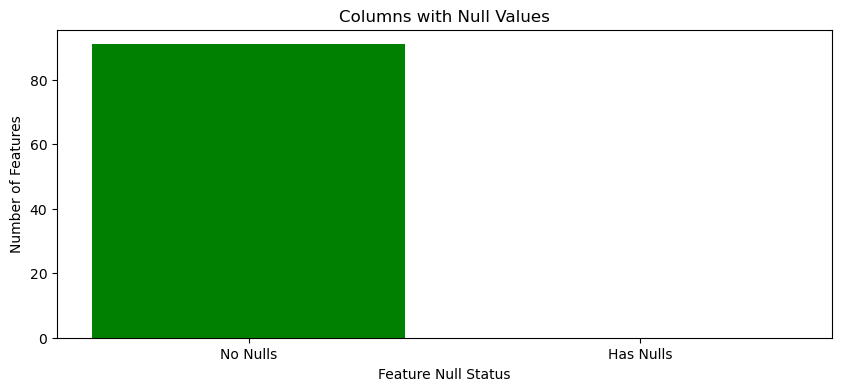

In [30]:
import matplotlib.pyplot as plt

# Count the number of columns with and without missing values
num_no_nulls = (df.isna().sum() == 0).sum()  # Columns with NO null values
num_with_nulls = (df.isna().sum() > 0).sum()  # Columns WITH null values

# Data for bar plot
categories = ['No Nulls', 'Has Nulls']
values = [num_no_nulls, num_with_nulls]

plt.figure(figsize=(10, 4))
plt.bar(categories, values, color=['green', 'red'])

# Titles and labels
plt.title('Columns with Null Values')
plt.xlabel('Feature Null Status')
plt.ylabel('Number of Features')

plt.show()


In [32]:
data_f=df.dropna()

In [34]:
(data_f.dtypes=='object')

id                     False
Flow ID                 True
Src IP                  True
Src Port               False
Dst IP                  True
                       ...  
ICMP Code              False
ICMP Type              False
Total TCP Flow Time    False
Label                   True
Attempted Category     False
Length: 91, dtype: bool

*----------------------------------------------------*

TARGET VARIAVLE CONVERTED TO NUMERICAL VALUES

In [16]:
data_f.loc[:, 'Label'] = data_f['Label'].map({'BENIGN':0, 'DoS slowloris':1, 'DoS Slowhttptest':2, 'DoS Hulk':3,
       'DoS GoldenEye':4, 'Heartbleed':5}).fillna(-1).astype(int)

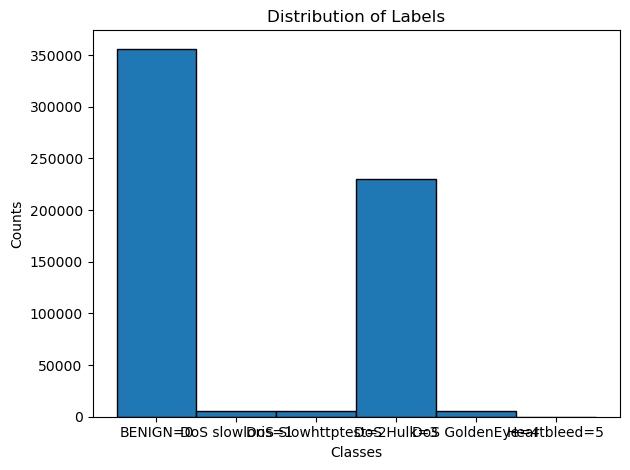

In [19]:
import matplotlib.pyplot as plt

# Ensure there are no NaN values in 'Label' before plotting
data_f = data_f.dropna(subset=['Label'])

# Update the number of bins based on the number of classes
plt.hist(data_f['Label'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')  
plt.xticks([0, 1, 2, 3, 4, 5], labels=['BENIGN=0', 'DoS slowloris=1', 'DoS Slowhttptest=2', 
                                      'DoS Hulk=3', 'DoS GoldenEye=4', 'Heartbleed=5'])
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Distribution of Labels')
plt.tight_layout()
plt.show()


In [ ]:
df.describe()

In [ ]:
X = data_f.drop('Label',axis=1)
y = data_f['Label'] 

In [ ]:
import numpy as np

print("NaN values in X:", np.isnan(X).sum().sum())  # Count total NaN values
print("Infinite values in X:", np.isinf(X).sum().sum())  # Count total inf values

In [ ]:
import numpy as np
import pandas as pd

# Future-proof Pandas behavior
pd.set_option('future.no_silent_downcasting', True)

# Replace Inf values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with the max finite value per column
X.fillna(X.max(), inplace=True)

# Remove any remaining Inf values
X = X[~X.isin([np.inf, -np.inf]).any(axis=1)]

# Clip extreme values
X_clipped = X.clip(lower=X.quantile(0.01), upper=X.quantile(0.99), axis=1)

# Explicitly cast float and int columns
for col in X_clipped.select_dtypes(include=['float']).columns:
    X_clipped[col] = X_clipped[col].astype(float)
for col in X_clipped.select_dtypes(include=['int']).columns:
    X_clipped[col] = X_clipped[col].astype(int)

# Print final check
print("NaN values in X:", X_clipped.isna().sum().sum())
print("Infinite values in X:", np.isinf(X_clipped).sum().sum())


In [ ]:
print(y.value_counts())
print(df['Label'].value_counts())  # Replace 'df' with your actual DataFrame

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Ensure y is properly formatted
y = pd.Series(y)  # Convert to Pandas Series
y = y.fillna(y.mode()[0])  # Replace NaNs with the most frequent label
y = y.astype(int).to_numpy()  # Convert back to NumPy array

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_clipped, y)

# Check class distribution after SMOTE
print(pd.Series(y_resampled).value_counts())


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert resampled labels to a Pandas Series
y_resampled_series = pd.Series(y_resampled)

# Count occurrences of each label after SMOTE
label_counts = y_resampled_series.value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Attack Type (0 = BENIGN, 1 = DDoS)')
plt.ylabel('Count')
plt.title('Balanced Label Distribution (After SMOTE)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show count values on top of bars
for i, v in enumerate(label_counts):
    plt.text(i, v + 50, str(v), ha='center', fontsize=12, fontweight='bold')

plt.show()


In [ ]:
# Convert resampled data into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X_clipped.columns)  # Restore column names
df_resampled['Label'] = y_resampled  # Add the resampled labels

# Describe the dataset
print(df_resampled.describe())


In [ ]:
print(data_f['Label'].unique())  # Check what values exist in the column

SPLITTING DATASET

In [ ]:
from sklearn.model_selection import train_test_split

# Split the resampled dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

# Print dataset sizes
print("Training data set size =", X_train.shape)
print("Testing data set size =", X_test.shape)

RANDOM FOREST ISSUE SOLVED TOO MANY NAN VALUES CANT HANDLE

In [ ]:
import numpy as np
import pandas as pd

print("Missing values per column:\n", X_train.isnull().sum())  # Check NaN values
print("\nInfinite values present:", np.isinf(X_train).sum().sum())  # Check inf values

***RANDOM FOREST***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model on the balanced training data
rf_model.fit(X_train, y_train)

print("Model training completed!")

In [ ]:
rf_pred=rf_model.predict(X_test)

In [ ]:
importances = rf_model.feature_importances_

# Sort indices based on feature importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)

# Generate feature names
feature_names = [f"Feature {i}" for i in indices]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure indices are sorted in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")

# Ensure feature_names is correctly indexed
plt.yticks(range(X_train.shape[1]), np.array(feature_names)[indices])

plt.title('Feature Importance')  # Keep only one title
plt.xlabel('Importance Score')
plt.ylabel('Features')

plt.show()


**PLOT DECISION TREE**

In [ ]:
from sklearn.tree import plot_tree
estimator = rf_model.estimators_[0]  # Use "estimators_" instead of "estimator_"

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)

plt.show()

MODEL EVALUATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [ ]:
rf_accuracy=accuracy_score(y_test,rf_pred)
rf_f1=f1_score(y_test,rf_pred)
rf_precision=precision_score(y_test,rf_pred)
rf_recall=recall_score(y_test,rf_pred)

In [ ]:
print('\nRandomForestMetrices:')
print(f'Accuracy:{rf_accuracy:.4f}')
print(f'F1 score:{rf_f1:.4f}')
print(f'Precision:{rf_f1:.4f}')
print(f'Recall:{rf_recall:.4f}')

In [ ]:
plot_confusion_matrix(y_test,rf_pred,['Benign','DDoS'],'Random Forest Confusion Matrix')

***LOGISTIC REGRESSION***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize features to improve convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Increase max_iter to allow more iterations for convergence
lr_model = LogisticRegression(random_state=42, max_iter=500)  # Default is 100

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)

print("Logistic Regression training completed!")

EVALUATE LOGISTIC REGRESSION

In [ ]:
lr_accuracy=accuracy_score(y_test,lr_pred)
lr_f1=f1_score(y_test,lr_pred)
lr_precision=precision_score(y_test,lr_pred)
lr_recall=recall_score(y_test,lr_pred)

In [ ]:
print('LOGISTIC REGRESSION:')
print(f'Accuracy:{lr_accuracy:.4f}')
print(f'F1 score:{lr_f1:.4f}')
print(f'Precision:{lr_f1:.4f}')
print(f'Recall:{lr_recall:.4f}')

In [ ]:
plot_confusion_matrix(y_test,lr_pred,['Benign','DDoS'],'Logistic Regression Confusion Matrix')

***NEURAL NETWORK***

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Standardize features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Increase max_iter to allow more training epochs
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Make predictions
nn_pred = nn_model.predict(X_test_scaled)

print("Neural Network training completed!")

In [ ]:
nn_accuracy=accuracy_score(y_test,nn_pred)
nn_f1=f1_score(y_test,nn_pred)
nn_precision=precision_score(y_test,nn_pred)
nn_recall=recall_score(y_test,nn_pred)

In [ ]:
print('NEURAL NETWORK:')
print(f'Accuracy:{nn_accuracy:.4f}')
print(f'F1 score:{nn_f1:.4f}')
print(f'Precision:{nn_f1:.4f}')
print(f'Recall:{nn_recall:.4f}')

In [ ]:
plot_confusion_matrix(y_test,nn_pred,['Benign','DDoS'],'Neural Network Confusion Matrix')

SUPPORT VECTOR MACHINE

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.svm import SVC


# # Initialize LabelEncoder and SimpleImputer
# label_encoder = LabelEncoder()
# imputer = SimpleImputer(strategy="mean")  # Replace NaN with column mean

# # Handle missing values in features
# x_train = imputer.fit_transform(x_train)
# x_test = imputer.transform(x_test)

# # Fit LabelEncoder on combined labels from train and test sets
# label_encoder.fit(list(y_train) + list(y_test))  # Ensures all labels are seen

# # Transform the labels
# y_train_encoded = label_encoder.transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Train the SVM model using the encoded labels
# svm_model = SVC(kernel='rbf', gamma='scale' , probability=True)
# svm_model.fit(x_train, y_train_encoded)

# # Make predictions (numerical labels)
# svm_pred = svm_model.predict(x_test)

# # Evaluate model performance
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# # Calculate evaluation metrics with `zero_division=1`
# svm_accuracy = accuracy_score(y_test_encoded, svm_pred)
# svm_f1 = f1_score(y_test_encoded, svm_pred, average='macro', zero_division=1)
# svm_precision = precision_score(y_test_encoded, svm_pred, average='macro', zero_division=1)
# svm_recall = recall_score(y_test_encoded, svm_pred, average='macro', zero_division=1)

In [ ]:
# print('\nSupportVectorMachine:')
# print(f'Accuracy:{svm_accuracy:.4f}')
# print(f'F1 score:{svm_f1:.4f}')
# print(f'Precision:{svm_f1:.4f}')
# print(f'Recall:{svm_recall:.4f}')

In [ ]:
# polt_confusion_matrix(y_test_encoded,svm_pred,['Benign','DDoS'],'SVM Confusion Matrix')

Random Forest

In [ ]:
rf_proba=rf_model.predict_proba(X_test)

Logistic Regression

In [ ]:
lr_proba=lr_model.predict_proba(X_test_scaled)

Neural Network

In [ ]:
nn_proba=nn_model.predict_proba(X_test_scaled)

SUPPORT VECTOR MACHINE

In [ ]:
# svm_proba=svm_model.predict_proba(x_test)

In [ ]:
# Compute ROC curves and AUC scores
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:,1])  # Ensure second column for positive class
rf_auc = auc(rf_fpr, rf_tpr)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:,1])
lr_auc = auc(lr_fpr, lr_tpr)

nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:,1])
nn_auc = auc(nn_fpr, nn_tpr)

# svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_proba[:,1])
# svm_auc = auc(svm_fpr, svm_tpr)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Corrected label argument
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC={rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC={lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC={nn_auc:.2f})')
# plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC={svm_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], linestyle="--", color="gray",label='Random classifier(AUC=0.50)')  # Diagonal reference line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Reciving Operating Characteristic(ROC) Curve Comparison')
plt.legend()  # Add legend
plt.grid()
plt.show() # Add legend

***Compute Performance Metrics***

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate models
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"📌 {model_name} Performance:")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1 Score: {f1:.4f}")
    print("-" * 40)

# Evaluate all models
evaluate_model("Random Forest", y_test, rf_model.predict(X_test))
evaluate_model("Logistic Regression", y_test, lr_model.predict(X_test_scaled))
evaluate_model("Neural Network", y_test, nn_model.predict(X_test_scaled))


***Plot Confusion Matrices***

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrices
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['BENIGN', 'DDoS'], yticklabels=['BENIGN', 'DDoS'])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Confusion matrices for each model
plot_conf_matrix(y_test, rf_model.predict(X_test), "Random Forest Confusion Matrix")
plot_conf_matrix(y_test, lr_model.predict(X_test_scaled), "Logistic Regression Confusion Matrix")
plot_conf_matrix(y_test, nn_model.predict(X_test_scaled), "Neural Network Confusion Matrix")


***Compare ROC Curves***

In [ ]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curves
def plot_roc_curve(model_name, y_true, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")

plt.figure(figsize=(8,6))
plot_roc_curve("Random Forest", y_test, rf_model.predict_proba(X_test)[:,1])
plot_roc_curve("Logistic Regression", y_test, lr_model.predict_proba(X_test_scaled)[:,1])
plot_roc_curve("Neural Network", y_test, nn_model.predict_proba(X_test_scaled)[:,1])

# Finalizing the plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


***SAVE THE MODELS***

In [ ]:
import joblib

# Save Random Forest
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save Logistic Regression
joblib.dump(lr_model, 'logistic_regression_model.pkl')

# Save Neural Network
joblib.dump(nn_model, 'neural_network_model.pkl')

print("Models saved successfully!")

***Scalar path***

In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler  # Import scaler if used

# Assuming you used a scaler during training
scaler = StandardScaler()

# Fit scaler on training data before training the model
X_train_scaled = scaler.fit_transform(X_train)

# Train models
rf_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)
nn_model.fit(X_train_scaled, y_train)

# Save models
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(lr_model, 'logistic_regression_model.pkl')
joblib.dump(nn_model, 'neural_network_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Models and scaler saved successfully!")

In [ ]:
# Load Random Forest
rf_model_loaded = joblib.load('random_forest_model.pkl')

# Load Logistic Regression
lr_model_loaded = joblib.load('logistic_regression_model.pkl')

# Load Neural Network
nn_model_loaded = joblib.load('neural_network_model.pkl')

print("Models loaded successfully!")

In [ ]:
import numpy as np
# Convert DataFrame to NumPy array before prediction
new_data_np = new_data.values  # Extract NumPy array from DataFrame

# Predict again
rf_pred = rf_model_loaded.predict(new_data)  # Random Forest supports DataFrame
lr_pred = lr_model_loaded.predict(new_data_np)  # Convert to NumPy
nn_pred = nn_model_loaded.predict(new_data_np)  # Convert to NumPy

print("🔹 Random Forest Prediction:", rf_pred[0])
print("🔹 Logistic Regression Prediction:", lr_pred[0])
print("🔹 Neural Network Prediction:", nn_pred[0])

In [ ]:
print("Number of features used in training:", len(X_train.columns))
print("Feature names:", list(X_train.columns))


In [ ]:
import numpy as np
import pandas as pd

# Get the actual feature names from training data
feature_names = list(X_train.columns)  # Ensure these match your trained model

# Example BENIGN sample with exactly 78 values
benign_sample = np.array([[80, 100000, 10, 8, 2000, 1500, 500, 100, 300, 50,
                           400, 100, 250, 60, 50000, 100, 2000, 500, 10000, 50,
                           5000, 1000, 250, 5000, 50, 4000, 900, 300, 5000, 100,
                           0, 0, 0, 0, 20, 20, 50, 30, 50, 1000, 500, 200, 0, 0, 0, 0, 1, 0, 0,
                           0, 10, 300, 200, 150, 20, 0, 0, 0, 0, 0, 0, 5, 1000, 5, 1500,
                           1024, 512, 5, 10, 500, 50, 2000, 100, 0, 0, 0, 0, 0]])

# Example DDoS sample with exactly 78 values (simulated based on attack characteristics)
ddos_sample = np.array([[80, 50000, 5000, 4500, 100000, 90000, 5000, 2000, 4000, 800,
                         5000, 1000, 3000, 700, 2000000, 5000, 500, 200, 1500, 20,
                         2000, 500, 300, 1500, 30, 2000, 600, 400, 2000, 50,
                         1, 0, 0, 0, 40, 40, 500, 400, 40, 4000, 3000, 250, 0, 1, 0, 1, 1, 1, 0,
                         1, 50, 4000, 3000, 2500, 50, 0, 0, 0, 0, 0, 0, 50, 4000, 50, 4500,
                         4096, 2048, 50, 100, 5000, 500, 4000, 200, 1, 1, 1, 1, 1]])

# Convert both samples to DataFrames
benign_df = pd.DataFrame(benign_sample, columns=feature_names)
ddos_df = pd.DataFrame(ddos_sample, columns=feature_names)

# Predict using trained models
rf_pred_benign = rf_model_loaded.predict(benign_df)
lr_pred_benign = lr_model_loaded.predict(benign_df.values)
nn_pred_benign = nn_model_loaded.predict(benign_df.values)

rf_pred_ddos = rf_model_loaded.predict(ddos_df)
lr_pred_ddos = lr_model_loaded.predict(ddos_df.values)
nn_pred_ddos = nn_model_loaded.predict(ddos_df.values)

# Print Predictions
print("\n📌 **Benign Sample Predictions**")
print("🔹 Random Forest Prediction:", rf_pred_benign[0])
print("🔹 Logistic Regression Prediction:", lr_pred_benign[0])
print("🔹 Neural Network Prediction:", nn_pred_benign[0])

print("\n📌 **DDoS Sample Predictions**")
print("🔹 Random Forest Prediction:", rf_pred_ddos[0])
print("🔹 Logistic Regression Prediction:", lr_pred_ddos[0])
print("🔹 Neural Network Prediction:", nn_pred_ddos[0])

In [ ]:
import numpy as np
import pandas as pd

# Define feature names used in training (adjust based on your model)
feature_names = [
    "Destination Port", "Flow Duration", "Total Fwd Packets", "Total Backward Packets",
    "Total Length of Fwd Packets", "Total Length of Bwd Packets", "Fwd Packet Length Max",
    "Fwd Packet Length Min", "Fwd Packet Length Mean", "Fwd Packet Length Std",
    "Bwd Packet Length Max", "Bwd Packet Length Min", "Bwd Packet Length Mean",
    "Bwd Packet Length Std", "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean",
    "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean",
    "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean",
    "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags",
    "Fwd URG Flags", "Bwd URG Flags", "Fwd Header Length", "Bwd Header Length",
    "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length", "Max Packet Length",
    "Packet Length Mean", "Packet Length Std", "Packet Length Variance",
    "FIN Flag Count", "SYN Flag Count", "RST Flag Count", "PSH Flag Count",
    "ACK Flag Count", "URG Flag Count", "CWE Flag Count", "ECE Flag Count",
    "Down/Up Ratio", "Average Packet Size", "Avg Fwd Segment Size", "Avg Bwd Segment Size",
    "Fwd Header Length.1", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk",
    "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk",
    "Bwd Avg Bulk Rate", "Subflow Fwd Packets", "Subflow Fwd Bytes",
    "Subflow Bwd Packets", "Subflow Bwd Bytes", "Init_Win_bytes_forward",
    "Init_Win_bytes_backward", "act_data_pkt_fwd", "min_seg_size_forward",
    "Active Mean", "Active Std", "Active Max", "Active Min",
    "Idle Mean", "Idle Std", "Idle Max", "Idle Min"
]

# Create a single row of input data with random values (replace with real packet data)
input_data = pd.DataFrame([np.random.rand(len(feature_names))], columns=feature_names)

# Ensure rf_model is trained before calling predict_proba()
probs = rf_model.predict_proba(input_data)
print(probs)


# Probability values
classes = ["Normal Traffic", "Attack (DoS/DDoS)"]
probs = [0.94, 0.06]  # Example probability output from the model

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(classes, probs, color=['green', 'red'])

# Labels and title
plt.ylabel("Probability")
plt.title("Traffic Classification Prediction")
plt.ylim(0, 1)  # Probability range (0 to 1)

# Display probability values on top of bars
for i, v in enumerate(probs):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', fontsize=12)

# Show plot
plt.show()

rf_probs_benign = rf_model_loaded.predict_proba(benign_df)
lr_probs_benign = lr_model_loaded.predict_proba(benign_df.values)
nn_probs_benign = nn_model_loaded.predict_proba(benign_df.values)

rf_probs_ddos = rf_model_loaded.predict_proba(ddos_df)
lr_probs_ddos = lr_model_loaded.predict_proba(ddos_df.values)
nn_probs_ddos = nn_model_loaded.predict_proba(ddos_df.values)

print("\n📌 **Benign Sample Probabilities**")
print("🔹 Random Forest Probabilities:", rf_probs_benign)
print("🔹 Logistic Regression Probabilities:", lr_probs_benign)
print("🔹 Neural Network Probabilities:", nn_probs_benign)

print("\n📌 **DDoS Sample Probabilities**")
print("🔹 Random Forest Probabilities:", rf_probs_ddos)
print("🔹 Logistic Regression Probabilities:", lr_probs_ddos)
print("🔹 Neural Network Probabilities:", nn_probs_ddos)
